In [10]:
# Official packages
import os
import copy

# Third-party packages
import numpy as np
import matplotlib.pyplot as plt

# In-house packages
from BrukerSpSpEpi import BrukerSpSpEpiExp


In [11]:
exp_dir = "../20230305_163320_AgroseCylinder2_1_1"
exp_nbr = 21
        
spsp_epi = BrukerSpSpEpiExp(exp_dir, exp_nbr)

def split_fid_2d(fid_2d):
    fid_left = fid_2d[...,:spsp_epi._exp_data_dim_dict['dim_k_raw_ro']:]
    fid_right = fid_2d[...,spsp_epi._exp_data_dim_dict['dim_k_raw_ro']::]
    return fid_left, fid_right

def mirror_odd_lines(fid_2d):
    mirrored_fid_2d = copy.deepcopy(fid_2d)
    for line_nbr, line in enumerate(mirrored_fid_2d):
        if (line_nbr % 2 ):
             mirrored_fid_2d[line_nbr] = line[::-1,...]
    return mirrored_fid_2d

def synthesize_phase_conjugate_fid_2d(zerofilled_fid_2d):
    synthesized_fid_2d = copy.deepcopy(zerofilled_fid_2d)
    for line_idx, line in enumerate(zerofilled_fid_2d):
        if (not line.any()):
            line = zerofilled_fid_2d[-1*line_idx]
            synthesized_fid_2d[line_idx] = line[::-1]
    return synthesized_fid_2d

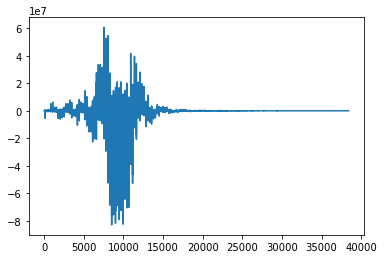

In [12]:
plt.plot((spsp_epi.fid['raw']))

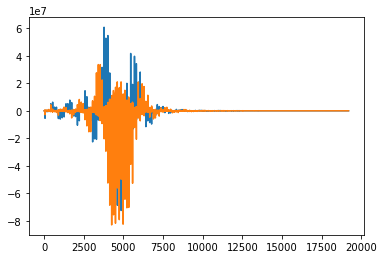

In [13]:
plt.plot(np.real(spsp_epi.fid['deserialized']))
plt.plot(np.imag(spsp_epi.fid['deserialized']))

In [14]:
np.shape(spsp_epi.fid['deserialized'])


(19200,)

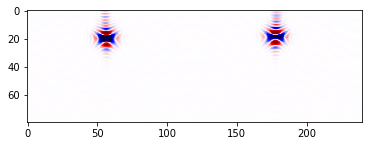

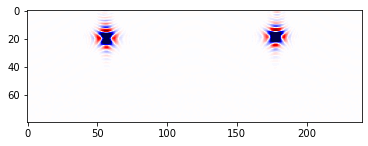

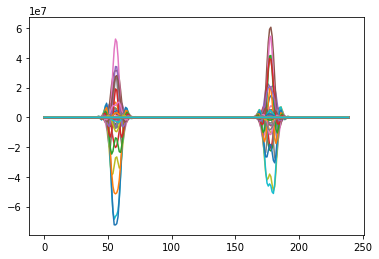

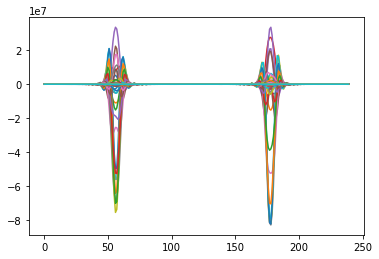

In [15]:
reformatted_fid_2d = np.reshape(spsp_epi.fid['deserialized'], (spsp_epi._exp_data_dim_dict['dim_k_raw_ph'],-1))

plt.figure()
plt.imshow(np.real(reformatted_fid_2d), cmap="seismic", vmin=-1*2**25, vmax=2**25)

plt.figure()
plt.imshow(np.imag(reformatted_fid_2d), cmap="seismic", vmin=-1*2**25, vmax=2**25)

plt.figure()
for line in reformatted_fid_2d:
    plt.plot(np.real(line))

plt.figure()
for line in reformatted_fid_2d:
    plt.plot(np.imag(line))



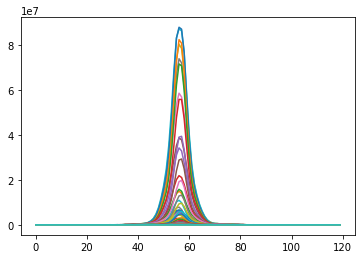

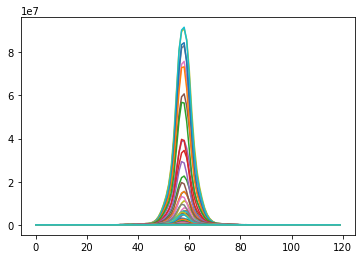

In [16]:
reformatted_left, reformatted_right = split_fid_2d(reformatted_fid_2d)

plt.figure()
for line in reformatted_left:
    plt.plot(np.abs(line))

plt.figure()
for line in reformatted_right:
    plt.plot(np.abs(line))

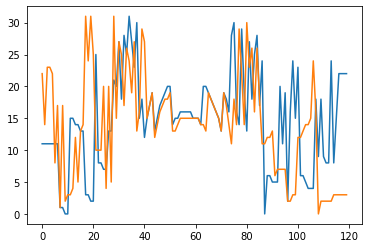

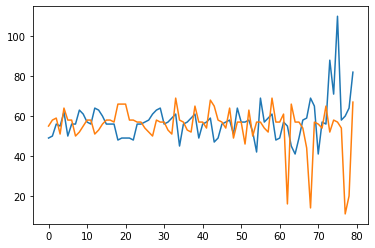

In [17]:
plt.figure()
plt.plot(np.argmax(reformatted_left, axis=0))
plt.plot(np.argmax(reformatted_right, axis=0))


plt.figure()
plt.plot(np.argmax(reformatted_left, axis=1))
plt.plot(np.argmax(reformatted_right, axis=1))


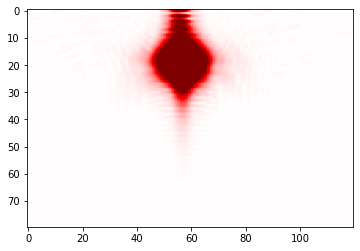

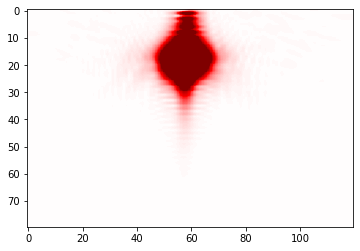

In [18]:

plt.figure()
plt.imshow(np.abs(reformatted_left), cmap="seismic", vmin=-1*2**22, vmax=2**22)
plt.figure()
plt.imshow(np.abs(reformatted_right), cmap="seismic", vmin=-1*2**22, vmax=2**22)



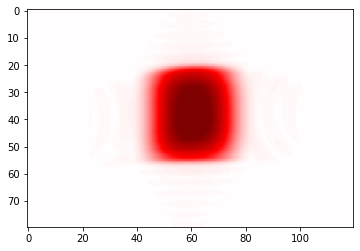

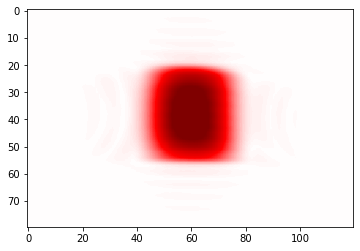

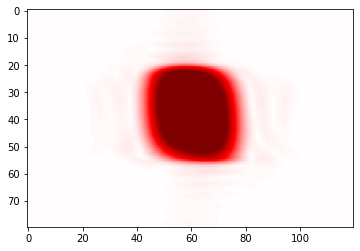

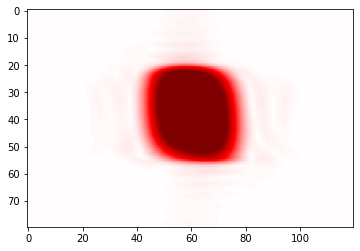

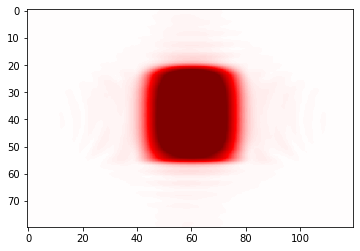

In [19]:

plt.figure()
plt.imshow(np.abs(np.fft.fftshift(np.fft.fft2(reformatted_left))), cmap="seismic", vmin=-1*2**31, vmax=2**31)


plt.figure()
plt.imshow(np.abs(np.fft.fftshift(np.fft.fft2(reformatted_right))), cmap="seismic", vmin=-1*2**31, vmax=2**31)

plt.figure()
plt.imshow(np.abs(np.fft.fftshift(np.fft.fft2(reformatted_left+reformatted_right))), cmap="seismic", vmin=-1*2**31, vmax=2**31)

plt.figure()
fft_reformatted_left = np.fft.fftshift(np.fft.fft2(reformatted_left))
fft_reformatted_right = np.fft.fftshift(np.fft.fft2(reformatted_right))
plt.imshow(np.abs(fft_reformatted_left+fft_reformatted_right), cmap="seismic", vmin=-1*2**31, vmax=2**31)


plt.figure()
plt.imshow(np.abs(fft_reformatted_left)+np.abs(fft_reformatted_right), cmap="seismic", vmin=-1*2**31, vmax=2**31)

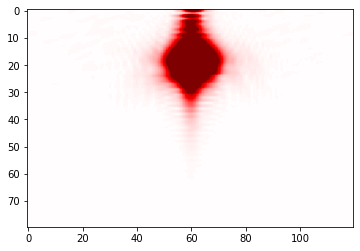

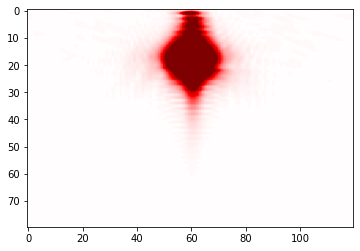

In [20]:
def align_echo_center(fid_2d):
    aligned_fid_2d = copy.deepcopy(fid_2d)
    for idx, line in enumerate(fid_2d):
        shift = 60 - np.argmax(np.abs(line))
        aligned_fid_2d[idx] = np.roll(line, shift)
    return aligned_fid_2d

aligned_left = align_echo_center(reformatted_left)
plt.figure()
plt.imshow(np.abs(aligned_left), cmap="seismic", vmin=-1*2**22, vmax=2**22)

aligned_right = align_echo_center(reformatted_right)
plt.figure()
plt.imshow(np.abs(aligned_right), cmap="seismic", vmin=-1*2**22, vmax=2**22)

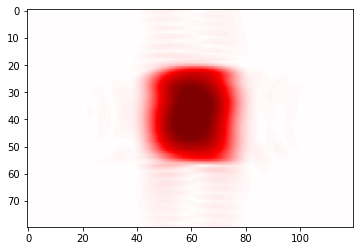

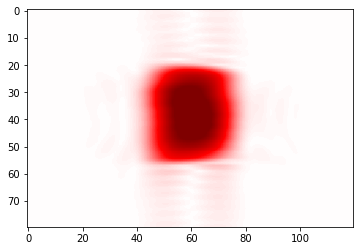

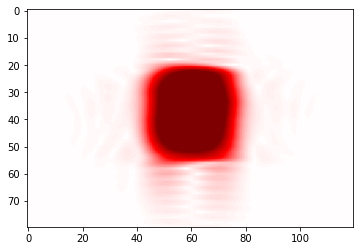

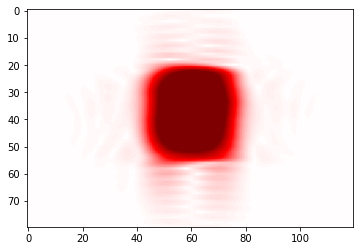

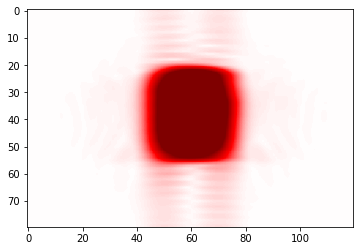

In [21]:
plt.figure()
fft_aligned_left = np.fft.fftshift(np.fft.fft2(aligned_left))
plt.imshow(np.abs(fft_aligned_left), cmap="seismic", vmin=-1*2**31, vmax=2**31)


plt.figure()
fft_aligned_right = np.fft.fftshift(np.fft.fft2(aligned_right))
plt.imshow(np.abs(fft_aligned_right), cmap="seismic", vmin=-1*2**31, vmax=2**31)

plt.figure()
plt.imshow(np.abs(np.fft.fftshift(np.fft.fft2(aligned_left+aligned_right))), cmap="seismic", vmin=-1*2**31, vmax=2**31)

plt.figure()
plt.imshow(np.abs(fft_aligned_right+fft_aligned_left), cmap="seismic", vmin=-1*2**31, vmax=2**31)


plt.figure()
plt.imshow(np.abs(fft_aligned_left)+np.abs(fft_aligned_right), cmap="seismic", vmin=-1*2**31, vmax=2**31)

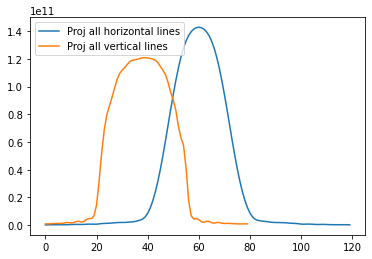

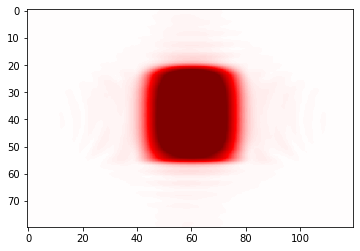

In [25]:
profile = np.abs(fft_reformatted_left)+np.abs(fft_reformatted_right)
plt.figure()
plt.plot(np.sum(profile, axis=0), label='Proj all horizontal lines')
plt.plot(np.sum(profile, axis=1), label='Proj all vertical lines')
plt.legend()

plt.figure()
plt.imshow(np.abs(fft_reformatted_left)+np.abs(fft_reformatted_right), cmap="seismic", vmin=-1*2**31, vmax=2**31)